Los ingresos anuales de un individuo son el resultado de varios factores. Intuitivamente, está influenciado por el nivel de educación del individuo, la edad, el género, la ocupación, etc.

Este es un conjunto de datos KNN muy citado. Lo encontré durante mi curso, y deseo compartirlo aquí porque es un buen ejemplo de inicio para el preprocesamiento de datos y las prácticas de aprendizaje automático.

Campos
El conjunto de datos contiene 16 columnas
Objetivo archivado: Ingresos
-- Los ingresos se dividen en dos clases: <=50K y >50K
Número de atributos: 14
-- Estos son los datos demográficos y otras características para describir a una persona

Podemos explorar la posibilidad de predecir el nivel de ingresos basándonos en la información personal del individuo.

Agradecimientos
Este conjunto de datos denominado "adulto" se encuentra en el repositorio de aprendizaje automático de la UCI
http://www.cs.toronto.edu/~delve/data/adult/desc.html

La descripción detallada del conjunto de datos puede encontrarse en la documentación original de la UCI
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html


In [1]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
data = pd.read_csv("/content/drive/MyDrive/Python/Curso de Técnicas de Operaciones /coursera-python-for-everybody-specialization/Tratamiento y transformación de Datos/Pandas/Project/4. Project - 3 (Case Study - 3)/adult.csv")

In [13]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# ***1.Display Top 10 Rows of The Dataset***

In [15]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# ***2. Check Last 10 Rows of The Dataset***

In [16]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# ***3. Find Shape of Our Dataset (Number of Rows And Number of Columns)***

In [18]:
data.shape

(48842, 15)

In [20]:
print("Número de filas ",data.shape[0])
print("Número de columnas ",data.shape[1])

Número de filas  48842
Número de columnas  15


# ***4. Getting Information About Our Dataset Like Total Number Rows, Total Number of  Columns, Datatypes of Each Column And Memory Requirement ***

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# ***5. Fetch Random Sample From the Dataset (50%)***

In [21]:
data.sample(frac=0.5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
29729,60,Private,103344,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,40,United-States,>50K
24588,29,Private,194864,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
11190,55,Local-gov,193895,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K
15686,51,Private,155963,9th,5,Divorced,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
37720,47,Federal-gov,98726,Bachelors,13,Married-spouse-absent,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20652,29,Private,52636,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
34997,25,Local-gov,203408,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
23649,36,Self-emp-not-inc,135416,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,50,United-States,<=50K
44117,24,Private,91999,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,20,United-States,<=50K


In [24]:
data.sample(frac=0.5,random_state=100) #Para dejar estatico la asignacián aleatoria

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
17918,28,Private,89718,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,2202,0,48,United-States,<=50K
11352,30,Private,351770,9th,5,Divorced,Other-service,Unmarried,White,Female,0,0,38,United-States,<=50K
36198,31,Private,164190,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48573,41,Private,318046,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K
47252,41,Local-gov,33658,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,>50K
33142,69,Private,312653,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,United-States,<=50K
2965,21,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [25]:
data_extraída_aleatoriamente = data.sample(frac=0.5,random_state=100)

In [26]:
data_extraída_aleatoriamente

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
17918,28,Private,89718,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,2202,0,48,United-States,<=50K
11352,30,Private,351770,9th,5,Divorced,Other-service,Unmarried,White,Female,0,0,38,United-States,<=50K
36198,31,Private,164190,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48573,41,Private,318046,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K
47252,41,Local-gov,33658,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,>50K
33142,69,Private,312653,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,United-States,<=50K
2965,21,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K


# ***6.Check Null Values In The Dataset***

In [41]:
data.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [31]:
data.isnull().sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

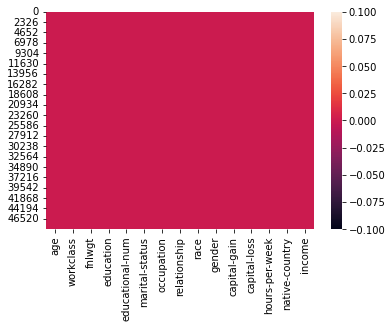

In [32]:
sns.heatmap(data.isnull())

# ***7.Perform Data Cleaning [ Replace '?' with NaN ]***


7.Realice la limpieza de datos [Reemplazar '?' con NaN]

In [42]:
data.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K
48823,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,<=50K
48824,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
48825,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48827,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
48828,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
48829,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48830,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
48831,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [43]:
data.isin(['?'])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [36]:
import numpy as np 

In [37]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [38]:
data['workclass'] = data['workclass'].replace('?',np.nan) # Es la nomenclatura para reemplazar. se debe guardar en la misma data, de lo contrario no se mantiende los datos
data['occupation'] = data['occupation'].replace('?',np.nan) 
data['native-country'] = data['native-country'].replace('?',np.nan) 

In [39]:
data.isin(['?'])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [45]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

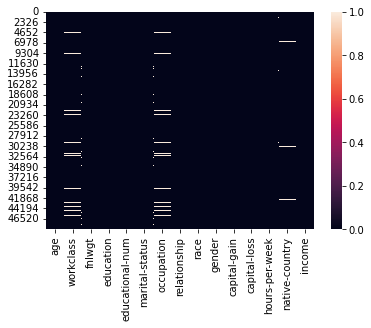

In [46]:
sns.heatmap(data.isnull())

# ***8. Drop all The Missing Values***

In [47]:
per_missing = data.isnull().sum() * 100/len(data)

In [48]:
per_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [49]:
data.dropna(how='any',inplace = True)
data.shape

(45222, 15)

In [50]:
per_missing = data.isnull().sum() * 100/len(data)

In [51]:
per_missing

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

# ***9. Check For Duplicate Data and Drop Them***

In [52]:
dup = data.duplicated().any()

In [53]:
print("Are there any duplicated values in data",dup)

Are there any duplicated values in data True


In [54]:
data = data.drop_duplicates()

In [57]:
data.shape

(45175, 15)

# ***10. Get Overall statics About The Dataframe ***

In [58]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [59]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [61]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [62]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [69]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

# **11. Drop The Columns número de educación, ganancia de capital y pérdida de capital**

In [70]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [72]:
data = data.drop(['educational-num','capital-gain','capital-loss'], axis=1)

In [73]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

# ***Univariate Analysis***

# ***12. What Is The Distribution of Age Column?***

In [74]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [75]:
data['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

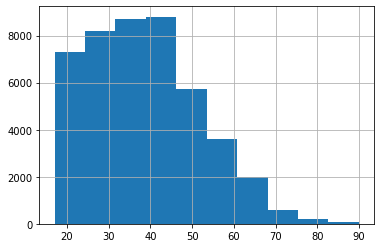

In [76]:
data['age'].hist()

# ***13. Encuentre el número total de personas que tienen entre 17 y 48 años (inclusive) utilizando el método Between***

In [78]:
(data['age'] >= 17) & (data['age'] <=48)

0         True
1         True
2         True
3         True
5         True
         ...  
48837     True
48838     True
48839    False
48840     True
48841    False
Name: age, Length: 45175, dtype: bool

In [79]:
sum((data['age'] >= 17) & (data['age'] <=48))

34858

In [80]:
data['age'].between(17,48)

0         True
1         True
2         True
3         True
5         True
         ...  
48837     True
48838     True
48839    False
48840     True
48841    False
Name: age, Length: 45175, dtype: bool

In [81]:
sum(data['age'].between(17,48))

34858

# ***14. What is The Distribution of Workclass Column?***

In [82]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [83]:
data['workclass']

0             Private
1             Private
2           Local-gov
3             Private
5             Private
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 45175, dtype: object

In [84]:
data['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

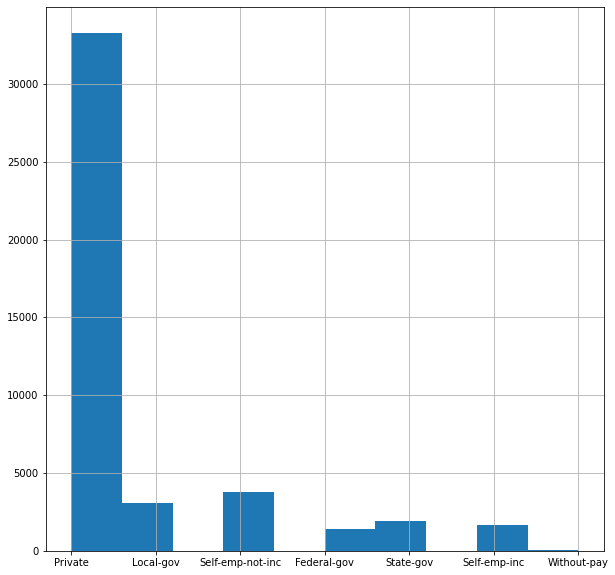

In [87]:
plt.figure(figsize=(10,10))
data['workclass'].hist()

15. ¿Cuántas personas tienen licenciatura y maestría?

In [88]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [90]:
filter1 = data['education'] == 'Bachelors'
filter2 = data['education'] == 'Masters'

In [92]:
filter1 | filter2

0        False
1        False
2        False
3        False
5        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education, Length: 45175, dtype: bool

In [93]:
data[filter1 | filter2]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,<=50K
24,25,Private,205947,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48817,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K
48819,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K
48825,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,<=50K
48834,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K


In [96]:
len(data[filter1 | filter2])

10072

In [98]:
data['education'].isin(['Bachelors','Masters'])

0        False
1        False
2        False
3        False
5        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Name: education, Length: 45175, dtype: bool

In [99]:
len(data['education'].isin(['Bachelors','Masters']))

45175

# ***16. Bivariate Analsis***

In [100]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

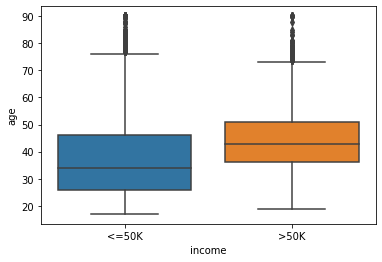

In [102]:
sns.boxplot(x='income',y='age',data=data)

# **17. Reemplazar los valores salariales con 0 y 1**

In [103]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [104]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [105]:
data['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


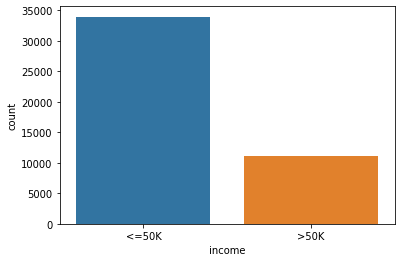

In [109]:
sns.countplot('income',data=data)

In [110]:
def salary_data(sal):
  if sal == '<=50K':
    return 0
  else:
    return 1

In [111]:
data['encoded_income'] = data['income'].apply(salary_data)

In [116]:
data['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45175, dtype: object

In [112]:
data.head(1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0


In [113]:
data['encoded_income']

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: encoded_income, Length: 45175, dtype: int64

18. ¿Qué clase de trabajo obtiene el salario más alto?

In [118]:
data.groupby('workclass')['encoded_income'].mean()

workclass
Federal-gov         0.390469
Local-gov           0.295161
Private             0.217816
Self-emp-inc        0.554407
Self-emp-not-inc    0.279051
State-gov           0.267215
Without-pay         0.095238
Name: encoded_income, dtype: float64

In [119]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,0


In [123]:
data.groupby('workclass')['encoded_income'].mean()

workclass
Federal-gov         0.390469
Local-gov           0.295161
Private             0.217816
Self-emp-inc        0.554407
Self-emp-not-inc    0.279051
State-gov           0.267215
Without-pay         0.095238
Name: encoded_income, dtype: float64

In [125]:
data.groupby('workclass')['encoded_income'].mean().sort_values()

workclass
Without-pay         0.095238
Private             0.217816
State-gov           0.267215
Self-emp-not-inc    0.279051
Local-gov           0.295161
Federal-gov         0.390469
Self-emp-inc        0.554407
Name: encoded_income, dtype: float64

In [120]:
data.groupby('workclass')['encoded_income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: encoded_income, dtype: float64

In [121]:
data.groupby('workclass')['encoded_income'].mean().sort_values(ascending=True)

workclass
Without-pay         0.095238
Private             0.217816
State-gov           0.267215
Self-emp-not-inc    0.279051
Local-gov           0.295161
Federal-gov         0.390469
Self-emp-inc        0.554407
Name: encoded_income, dtype: float64

19.¿Quién tiene más posibilidades de obtener un salario superior a 50 mil hombres o mujeres?

In [129]:
data.groupby('gender')['encoded_income'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: encoded_income, dtype: float64

20. Convertir el tipo de datos de las columnas de la clase de trabajo en un tipo de datos de categoría

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  object
 12  encoded_income  45175 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 6.1+ MB


In [132]:
data['workclass'].astype('category')

0             Private
1             Private
2           Local-gov
3             Private
5             Private
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 45175, dtype: category
Categories (7, object): ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc',
                         'State-gov', 'Without-pay']

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  object
 12  encoded_income  45175 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 6.1+ MB
